In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import pandas as pd
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms, datasets, utils, models
from torchsummary import summary
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from PIL import Image
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16, 'axes.labelweight': 'bold', 'axes.grid': False})



X.shape: (500, 3), y.shape: (500,)
X[0].shape: (3,) X[1].shape: (3,) X[2].shape: (3,)


(3, 500)

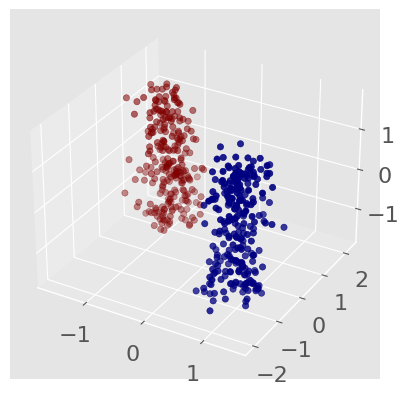

In [8]:
%matplotlib inline
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

n_samples = 500
X, y = make_blobs(n_samples, n_features=2, centers=2, cluster_std=1, random_state=123)
X = np.concatenate((X, np.random.random((n_samples, 1))), axis=1)
X = StandardScaler().fit_transform(X)
X_for_plot = np.transpose(X)
ax.scatter3D(X_for_plot[0], X_for_plot[1], X_for_plot[2], c=y, cmap='jet');

# plot_scatter3D(X, y)
print(f"X.shape: {X.shape}, y.shape: {y.shape}")
print(f"X[0].shape: {X[0].shape} X[1].shape: {X[1].shape} X[2].shape: {X[2].shape}")
X[0]
X_for_plot.shape

In [9]:
class autoencoder(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.Sigmoid()
        )
        self.decoder = nn.Sequential(
            nn.Linear(hidden_size, input_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        y = self.encoder(x)
        z = self.decoder(y)
        return z

In [10]:
BATCH_SIZE = 100
torch.manual_seed(1)
X_tensor = torch.tensor(X, dtype=torch.float32)
dataloader = DataLoader(X_tensor,
                        batch_size=BATCH_SIZE)
model = autoencoder(3, 2)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

In [11]:
EPOCHS = 5

for epoch in range(EPOCHS):
    for batch in dataloader:
        optimizer.zero_grad()           # Clear gradients w.r.t. parameters
        y_hat = model(batch)            # Forward pass to get output
        loss = criterion(y_hat, batch)  # Calculate loss
        loss.backward()                 # Getting gradients w.r.t. parameters
        optimizer.step()                # Update parameters

In [12]:
model.eval()
print(f"Original X shape = {X_tensor.shape}")
X_encoded = model.encoder(X_tensor)
print(f" Encoded X shape = {X_encoded.shape}")

Original X shape = torch.Size([500, 3])
 Encoded X shape = torch.Size([500, 2])


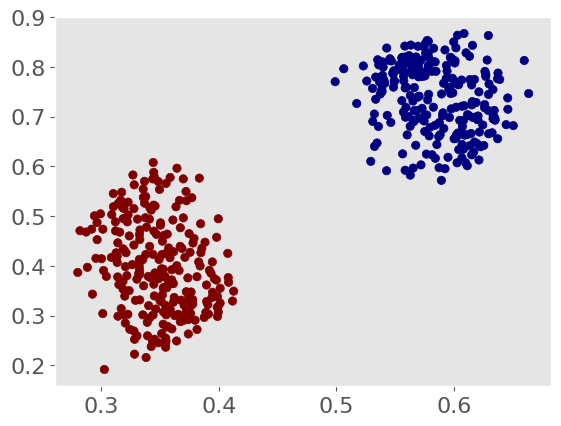

In [13]:
X_for_plot = np.transpose(X_encoded.detach().numpy())
plt.scatter(X_for_plot[0], X_for_plot[1], c=y, cmap='jet')
plt.show()

In [40]:
def add_noise(X, noise=0.5):
    N = X + noise * torch.randn(X.shape)
    return N

def print_images(grid_dims, img_list):
    fig = plt.figure(figsize=(6.0, 6.0))
    grid = ImageGrid(
        fig,
        111,  # similar to subplot(111)
        nrows_ncols=grid_dims,  # creates 2x2 grid of axes
        axes_pad=0.1,  # pad between axes in inch.
    )
    for ax, im in zip(
        grid, img_list
    ):
        # Iterating over the grid returns the Axes.
        ax.imshow(im)

    plt.show()



In [41]:
BATCH_SIZE = 32



# Download data
transform = transforms.Compose([transforms.ToTensor()])
trainset = datasets.MNIST('data/', download=True, train=True, transform=transform)
idx = trainset.targets == 8  # let's only work with the number 8
trainset.targets = trainset.targets[idx]
trainset.data = trainset.data[idx]
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)

# Sample plot
X, y = next(iter(trainloader))
noise = 0.5
X[0].shape

torch.Size([1, 28, 28])

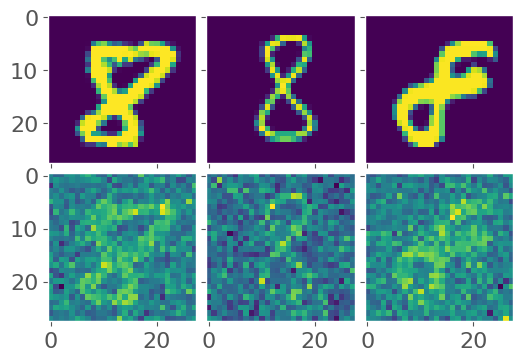

In [42]:




    
    
img_list = [X[i].squeeze() for i in range(3)] + [
        add_noise(X[i]).squeeze() for i in range(3)
    ]


print_images((2,3), img_list)

In [63]:
def conv_block(input_channels, output_channels):
    return nn.Sequential(
        nn.Conv2d(input_channels, output_channels, 3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)  # reduce x-y dims by two; window and stride of 2
    )

def deconv_block(input_channels, output_channels, kernel_size):
    return nn.Sequential(
        nn.ConvTranspose2d(input_channels, output_channels, kernel_size, stride=2),
        nn.ReLU()
    )

class Autoencoder(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            conv_block(1, 32),
             conv_block(32, 16),
             conv_block(16, 8)
        )
        self.decoder = nn.Sequential(
            deconv_block(8, 8, 3),
            deconv_block(8, 16, 2),
            deconv_block(16, 32, 2),
            nn.Conv2d(32, 1, 3, padding=1)  # final conv layer to decrease channel back to 1
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        x = torch.sigmoid(x)  # get pixels between 0 and 1
        return x

X[0].shape: torch.Size([1, 28, 28])
pred.shape: torch.Size([1, 28, 28])


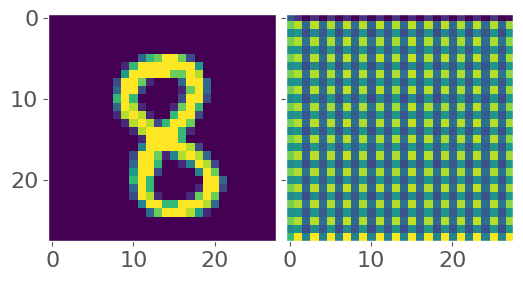

In [69]:
X, y = next(iter(trainloader))
model = Autoencoder()
pred = model(X[0])

print(f"X[0].shape: {X[0].shape}")
print(f"pred.shape: {pred.shape}")

# X[0].shape: torch.Size([1, 28, 28])
# pred.shape: torch.Size([32, 14, 14])
# pred.shape: torch.Size([16, 7, 7])
# pred.shape: torch.Size([8, 3, 3])

# pred.shape: torch.Size([8, 7, 7])
# pred.shape: torch.Size([16, 14, 14])
# pred.shape: torch.Size([32, 28, 28])
# pred.shape: torch.Size([1, 28, 28])


print_images((1,2),[X[0].squeeze(), pred[0].squeeze().detach()])


In [71]:
EPOCHS = 20
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

for epoch in range(EPOCHS):
    losses = 0
    for batch, _ in trainloader:
        noisy_batch = batch + noise * torch.randn(*batch.shape)
        noisy_batch = torch.clip(noisy_batch, 0.0, 1.0)
        optimizer.zero_grad()
        y_hat = model(noisy_batch)
        loss = criterion(y_hat, batch)
        loss.backward()
        optimizer.step()
        losses += loss.item()
    print(f"epoch: {epoch + 1}, loss: {losses / len(trainloader):.4f}")
    

epoch: 1, loss: 0.0621
epoch: 2, loss: 0.0478
epoch: 3, loss: 0.0444
epoch: 4, loss: 0.0424
epoch: 5, loss: 0.0411
epoch: 6, loss: 0.0402
epoch: 7, loss: 0.0394
epoch: 8, loss: 0.0386
epoch: 9, loss: 0.0378
epoch: 10, loss: 0.0370
epoch: 11, loss: 0.0365
epoch: 12, loss: 0.0360
epoch: 13, loss: 0.0355
epoch: 14, loss: 0.0349
epoch: 15, loss: 0.0348
epoch: 16, loss: 0.0344
epoch: 17, loss: 0.0341
epoch: 18, loss: 0.0338
epoch: 19, loss: 0.0335
epoch: 20, loss: 0.0333


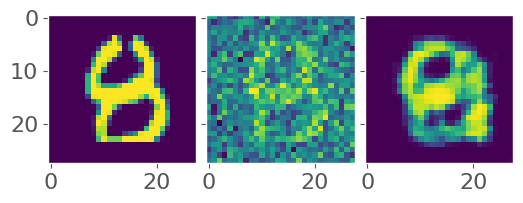

In [82]:
X, y = next(iter(trainloader))
X_noisy = add_noise(X)
pred = model(X_noisy)

index = np.random.randint(32)

print_images(
    (1, 3),
    [X[index].squeeze(), X_noisy[index].squeeze(), pred[index].squeeze().detach()],
)